# Imports

In [1]:
import os 
import re
import pandas as pd

# Find data paths

In [2]:
gas_csvs = os.listdir('GasElecNetherlandsDatasets/Gas')
electricity_csvs = os.listdir('GasElecNetherlandsDatasets/Electricity')

In [3]:
df = pd.read_csv('GasElecNetherlandsDatasets/Gas' + "/" + gas_csvs[0])

df

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AA,4301AA,ZIERIKZEE,14,100.0,100.00,"50,00",G4,3736,0.0,0.00
1,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AB,4301AD,ZIERIKZEE,32,100.0,100.00,"71,88",G4,2649,0.0,12.50
2,8717127750009,GAS Gastransport Services (GASUNIE),Korte St. Janstraat,4301AE,4301AE,ZIERIKZEE,17,100.0,100.00,"88,24",G4,1841,0.0,5.88
3,8717127750009,GAS Gastransport Services (GASUNIE),Fonteine,4301AG,4301AH,ZIERIKZEE,31,100.0,100.00,"100,00",G4,1264,0.0,16.13
4,8717127750009,GAS Gastransport Services (GASUNIE),Lange St. Janstraat,4301AJ,4301AJ,ZIERIKZEE,16,100.0,100.00,"100,00",G4,1230,0.0,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,8717127750009,GAS Gastransport Services (GASUNIE),Dorpsweg,4698RG,4698RG,OUD-VOSSEMEER,24,100.0,100.00,"100,00",G4,1331,0.0,12.50
8930,8717127750009,GAS Gastransport Services (GASUNIE),Hikseweg,4698RJ,4698RL,OUD-VOSSEMEER,26,100.0,100.00,"96,15",G4,1873,0.0,3.85
8931,8717127750009,GAS Gastransport Services (GASUNIE),Veerstraat,4698RM,4698RM,OUD-VOSSEMEER,14,100.0,92.86,"100,00",G4,2060,0.0,7.14
8932,8717127750009,GAS Gastransport Services (GASUNIE),Haven,4698RN,4698RS,OUD-VOSSEMEER,32,100.0,100.00,"100,00",G4,1437,0.0,9.38


In [4]:
print('Total length', len(df))
print('street, zipcode_from, zipcode_to', len(df[['street', 'zipcode_from', 'zipcode_to']].drop_duplicates()))
print('street, zipcode_from', len(df[['street', 'zipcode_from']].drop_duplicates()))
print('purchase_area', len(df[['purchase_area']].drop_duplicates()))

# print('Net_manager', len(df[['street', 'zipcode_from', 'zipcode_to']].drop_duplicates()))

Total length 8934
street, zipcode_from, zipcode_to 8934
street, zipcode_from 8934
purchase_area 1


# Read data

In [5]:
def find_years_in_string(input_string):
    """
    This function returns all matching years in the input string.
    """

    return re.findall(r'20\d{2}', input_string)

def concatenate_csvs(folder_path: str):
    """
    This function reads all the csvs and concats them. 
    For each CSV, add:
    * which supplier it's from
    * the year (0-th item from find_years_in_string because this returns an array and we only want 1 value)
    """
    
    csv_list = os.listdir(folder_path)
   
    df = pd.read_csv(folder_path + "/" + csv_list[0])
    df = df.assign(Supplier = csv_list[0].split('_')[0])
    df = df.assign(Year = find_years_in_string(csv_list[0])[0])
    
    for filename in csv_list[1:]:
        df_tmp = pd.read_csv(folder_path + "/" + filename)
        df_tmp = df_tmp.assign(Supplier = filename.split('_')[0])
        df_tmp = df_tmp.assign(Year = find_years_in_string(filename)[0])
        df = pd.concat([df, df_tmp])
    
    return df

In [6]:
df_gas = concatenate_csvs(folder_path = 'GasElecNetherlandsDatasets/Gas')
df_electricity = concatenate_csvs(folder_path = 'GasElecNetherlandsDatasets/Electricity')

In [7]:
df_gas

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Supplier,Year,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AA,4301AA,ZIERIKZEE,14.0,100.0,100.0,"50,00",G4,3736.0,0.0,0.00,endurisgas,2015,NaN,NaN,NaN
1,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AB,4301AD,ZIERIKZEE,32.0,100.0,100.0,"71,88",G4,2649.0,0.0,12.50,endurisgas,2015,NaN,NaN,NaN
2,8717127750009,GAS Gastransport Services (GASUNIE),Korte St. Janstraat,4301AE,4301AE,ZIERIKZEE,17.0,100.0,100.0,"88,24",G4,1841.0,0.0,5.88,endurisgas,2015,NaN,NaN,NaN
3,8717127750009,GAS Gastransport Services (GASUNIE),Fonteine,4301AG,4301AH,ZIERIKZEE,31.0,100.0,100.0,"100,00",G4,1264.0,0.0,16.13,endurisgas,2015,NaN,NaN,NaN
4,8717127750009,GAS Gastransport Services (GASUNIE),Lange St. Janstraat,4301AJ,4301AJ,ZIERIKZEE,16.0,100.0,100.0,"100,00",G4,1230.0,0.0,6.25,endurisgas,2015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,NaN,GAS Gastransport Services (GASUNIE),Dorpsweg,4698RG,4698RG,OUD-VOSSEMEER,24.0,100.0,100.0,"100,00",G4,1160.0,0.0,0.00,endurisgas,2018,8.717128e+12,NaN,NaN
9036,NaN,GAS Gastransport Services (GASUNIE),Hikseweg,4698RJ,4698RL,OUD-VOSSEMEER,26.0,100.0,100.0,"96,15",G4,1679.0,0.0,0.00,endurisgas,2018,8.717128e+12,NaN,NaN
9037,NaN,GAS Gastransport Services (GASUNIE),Veerstraat,4698RM,4698RM,OUD-VOSSEMEER,20.0,100.0,95.0,"100,00",G4,1479.0,0.0,0.00,endurisgas,2018,8.717128e+12,NaN,NaN
9038,NaN,GAS Gastransport Services (GASUNIE),Haven,4698RN,4698RS,OUD-VOSSEMEER,32.0,100.0,100.0,"100,00",G4,1273.0,0.0,0.00,endurisgas,2018,8.717128e+12,NaN,NaN


In [8]:
df_electricity

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Supplier,Year,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,8716874000009,Stedin Utrecht,Egelshoek,1213RC,1231AB,HILVERSUM,30.0,90.00,100.00,80,3x25,5909.0,90.00,53.33,stedin,2019,NaN,NaN,NaN
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17.0,100.00,100.00,41,1x25,3062.0,94.12,76.47,stedin,2019,NaN,NaN,NaN
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17.0,100.00,100.00,47,3x25,3959.0,82.35,52.94,stedin,2019,NaN,NaN,NaN
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20.0,100.00,100.00,45,3x25,4230.0,90.00,45.00,stedin,2019,NaN,NaN,NaN
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17.0,94.12,100.00,71,1x25,3180.0,94.12,88.24,stedin,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82999,8716924000003,Stedin Weert,Engelbrechtstraat,6006ZT,6006ZT,WEERT,21.0,100.00,100.00,90,1x35,2801.0,14.29,4.76,stedin,2014,NaN,NaN,NaN
83000,8716924000003,Stedin Weert,Margrietlaan,6006ZV,6006ZV,WEERT,11.0,100.00,100.00,82,1x35,3035.0,27.27,0.00,stedin,2014,NaN,NaN,NaN
83001,8716924000003,Stedin Weert,Margrietlaan,6006ZW,6006ZW,WEERT,25.0,100.00,100.00,72,1x35,3619.0,44.00,0.00,stedin,2014,NaN,NaN,NaN
83002,8716924000003,Stedin Weert,Margrietlaan,6006ZX,6006ZX,WEERT,18.0,94.44,100.00,94,1x35,2904.0,33.33,5.56,stedin,2014,NaN,NaN,NaN


In [9]:
df_gas = df_gas.assign(type_of_power = "Gas")
df_electricity = df_electricity.assign(type_of_power = "Electricity")
df_gas_electricity = pd.concat([df_gas, df_electricity])
wanted_cols = ['net_manager', 'purchase_area', 'street', 'zipcode_from',
               'zipcode_to', 'city', 'num_connections', 'delivery_perc',
               'perc_of_active_connections', 'type_conn_perc',
               'type_of_connection', 'annual_consume',
               'annual_consume_lowtarif_perc', 'smartmeter_perc', 
               'Year', 'Supplier', 'type_of_power']

df_gas_electricity = df_gas_electricity[wanted_cols]
df_gas_electricity

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Supplier,type_of_power
0,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AA,4301AA,ZIERIKZEE,14.0,100.00,100.00,"50,00",G4,3736.0,0.00,0.00,2015,endurisgas,Gas
1,8717127750009,GAS Gastransport Services (GASUNIE),Poststraat,4301AB,4301AD,ZIERIKZEE,32.0,100.00,100.00,"71,88",G4,2649.0,0.00,12.50,2015,endurisgas,Gas
2,8717127750009,GAS Gastransport Services (GASUNIE),Korte St. Janstraat,4301AE,4301AE,ZIERIKZEE,17.0,100.00,100.00,"88,24",G4,1841.0,0.00,5.88,2015,endurisgas,Gas
3,8717127750009,GAS Gastransport Services (GASUNIE),Fonteine,4301AG,4301AH,ZIERIKZEE,31.0,100.00,100.00,"100,00",G4,1264.0,0.00,16.13,2015,endurisgas,Gas
4,8717127750009,GAS Gastransport Services (GASUNIE),Lange St. Janstraat,4301AJ,4301AJ,ZIERIKZEE,16.0,100.00,100.00,"100,00",G4,1230.0,0.00,6.25,2015,endurisgas,Gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82999,8716924000003,Stedin Weert,Engelbrechtstraat,6006ZT,6006ZT,WEERT,21.0,100.00,100.00,90,1x35,2801.0,14.29,4.76,2014,stedin,Electricity
83000,8716924000003,Stedin Weert,Margrietlaan,6006ZV,6006ZV,WEERT,11.0,100.00,100.00,82,1x35,3035.0,27.27,0.00,2014,stedin,Electricity
83001,8716924000003,Stedin Weert,Margrietlaan,6006ZW,6006ZW,WEERT,25.0,100.00,100.00,72,1x35,3619.0,44.00,0.00,2014,stedin,Electricity
83002,8716924000003,Stedin Weert,Margrietlaan,6006ZX,6006ZX,WEERT,18.0,94.44,100.00,94,1x35,2904.0,33.33,5.56,2014,stedin,Electricity


# EDA

### Number of rows in both data sets

In [10]:
print('Gas', len(df_gas))
print('Electricity', len(df_electricity))

Gas 3704367
Electricity 4077352


### Number of columns for both data sets

In [11]:
print('Gas', len(df_gas.columns))
print('Electricity', len(df_electricity.columns))

Gas 20
Electricity 20


### Year range for both data sets

In [12]:
print('Gas', df_gas['Year'].min(), df_gas['Year'].max())
print('Electricity', df_electricity['Year'].min(), df_electricity['Year'].max())

Gas 2009 2020
Electricity 2009 2020


### Check for NULLs

In [13]:
df_gas_electricity.isnull().sum() / len(df_gas_electricity) * 100

net_manager                      0.723915
purchase_area                   14.426028
street                           0.000000
zipcode_from                     0.000013
zipcode_to                       0.000000
city                             0.000000
num_connections                  0.000218
delivery_perc                    0.091060
perc_of_active_connections       0.083581
type_conn_perc                   3.459364
type_of_connection               2.448868
annual_consume                   0.000000
annual_consume_lowtarif_perc     0.746043
smartmeter_perc                 14.380306
Year                             0.000000
Supplier                         0.000000
type_of_power                    0.000000
dtype: float64

In [14]:
df_gas.isnull().sum() / len(df_gas) * 100

net_manager                       0.731812
purchase_area                     6.369131
street                            0.000000
zipcode_from                      0.000027
zipcode_to                        0.000000
city                              0.000000
num_connections                   0.000270
delivery_perc                     0.135435
perc_of_active_connections        0.135435
type_conn_perc                    3.894269
type_of_connection                2.239951
annual_consume                    0.000000
annual_consume_lowtarif_perc      1.209032
smartmeter_perc                  29.850363
Supplier                          0.000000
Year                              0.000000
ï»¿NETBEHEERDER                  99.268188
STANDAARDDEVIATIE               100.000000
%Defintieve aansl (NRM)          99.375467
type_of_power                     0.000000
dtype: float64

In [15]:
df_electricity.isnull().sum() / len(df_electricity) * 100

net_manager                      0.716740
purchase_area                   21.745903
street                           0.000000
zipcode_from                     0.000000
zipcode_to                       0.000000
city                             0.000000
num_connections                  0.000172
delivery_perc                    0.050744
perc_of_active_connections       0.036470
type_conn_perc                   3.064244
type_of_connection               2.638673
annual_consume                   0.000000
annual_consume_lowtarif_perc     0.325407
smartmeter_perc                  0.325407
Supplier                         0.000000
Year                             0.000000
ï»¿NETBEHEERDER                 99.283260
STANDAARDDEVIATIE               97.882498
%Defintieve aansl (NRM)         99.402995
type_of_power                    0.000000
dtype: float64

### Check normality of the data

### Check primary keys

In [16]:
print('Total length', len(df_gas_electricity))
print('Net_manager', len(df_gas_electricity[['street', 'zipcode_from', 'zipcode_to']].drop_duplicates()))
print('Net_manager', len(df_gas_electricity[['street', 'zipcode_from', 'zipcode_to']].drop_duplicates()))

Total length 7781719
Net_manager 466012
Net_manager 466012


### Check consumption per city

In [17]:
df_gas_electricity.groupby('city')['annual_consume'].mean()

city
'S GRAVENDEEL        1382.750000
'S GRAVENHAGE        2781.696970
'S GRAVENMOER        3627.224035
'S-GRAVELAND         4169.002268
'S-GRAVENDEEL        2997.004919
                        ...     
ZWINDEREN            6182.712410
ZWOLLE               2793.683643
Zwaagdijk-Oost       7352.750000
\'T LOO OLDEBROEK    4070.769231
loo                  4960.333333
Name: annual_consume, Length: 2682, dtype: float64

### Plot timeseries

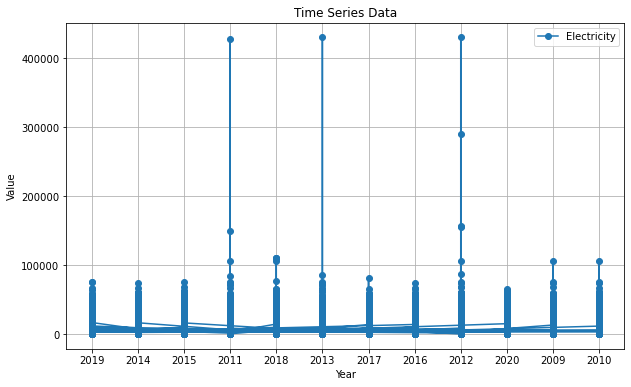

In [51]:
import matplotlib.pyplot as plt

# Example daata for two time series
years_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['Year']
values_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['annual_consume']

# years_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['Year']
values_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['annual_consume']

# Plot the two time series on the same graph
plt.figure(figsize=(10, 6))
# plt.plot(years_gas, values_gas, marker='o', linestyle='-', label='Gas')
plt.plot(years_electricity, values_electricity, marker='o', linestyle='-', label='Electricity')

plt.title("Time Series Data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

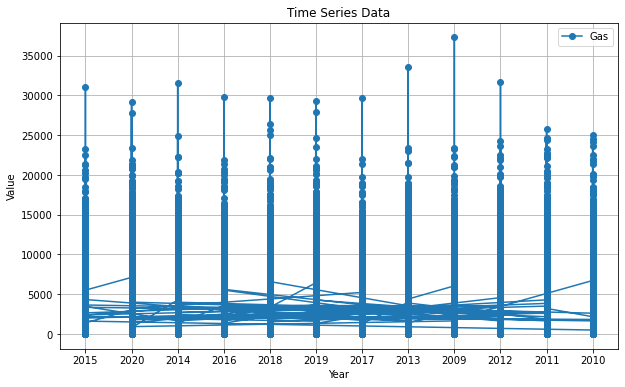

In [52]:
import matplotlib.pyplot as plt

# Example data for two time series
years_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['Year']
values_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['annual_consume']

years_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['Year']
values_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['annual_consume']

# Plot the two time series on the same graph
plt.figure(figsize=(10, 6))
plt.plot(years_gas, values_gas, marker='o', linestyle='-', label='Gas')
# plt.plot(years_electricity, values_electricity, marker='o', linestyle='-', label='Electricity')

plt.title("Time Series Data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot of averages

In [39]:
def plot_avg_annual_consume(df: pd.DataFrame, energy_type: str):
    df_subset = df[df['type_of_power']==energy_type]
    df_subset['Year'] = df_subset['Year'].astype(int)
    suppliers = df_subset['Supplier'].unique()

    plt.figure(figsize=(10, 6))

    for supplier in suppliers:
        supplier_avg = df_subset[df_subset['Supplier'] == supplier].groupby('Year')['annual_consume'].mean()
        plt.plot(supplier_avg, marker='o', linestyle='-', label=supplier)

    plt.title(f"Average annual {energy_type} consume per supplier")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/5d/wxpmfjl1393cfs6vwjmlg6mh0000gn/T/ipykernel_6638/323497358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Year'] = df_subset['Year'].astype(int)


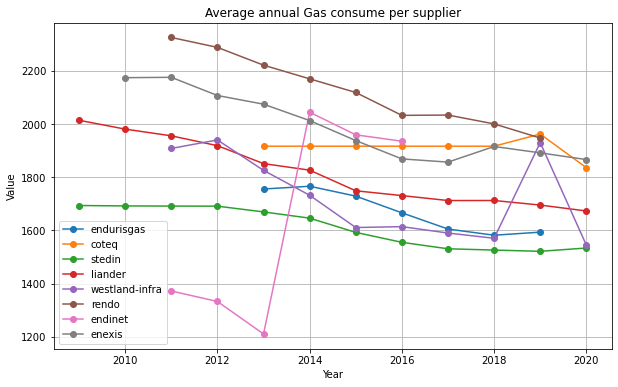

In [40]:
plot_avg_annual_consume(df_gas_electricity, energy_type = "Gas")

/var/folders/5d/wxpmfjl1393cfs6vwjmlg6mh0000gn/T/ipykernel_6638/323497358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Year'] = df_subset['Year'].astype(int)


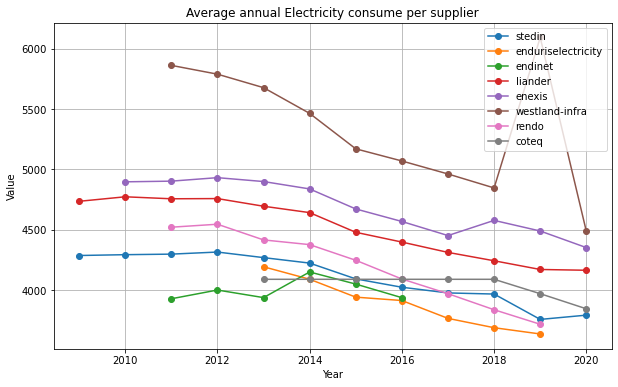

In [41]:
plot_avg_annual_consume(df_gas_electricity, energy_type = "Electricity")

In [18]:
import matplotlib.pyplot as plt

# Example data for two time series
gas_avg = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas'].groupby('year').agg(avg('annual_consume'))
# years_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['Year']
# # values_gas = df_gas_electricity[df_gas_electricity['type_of_power']=='Gas']['annual_consume']

# years_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['Year']
# values_electricity = df_gas_electricity[df_gas_electricity['type_of_power']=='Electricity']['annual_consume']

# Plot the two time series on the same graph
plt.figure(figsize=(10, 6))
plt.plot(years_gas, values_gas, marker='o', linestyle='-', label='Gas')
# plt.plot(years_electricity, values_electricity, marker='o', linestyle='-', label='Electricity')

plt.title("Time Series Data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'year'

# Monthly data

In [97]:
monthly_gas = pd.read_csv('Data/EuroStat_NL_monthly_gas_consumption.tsv',sep='\t')


In [98]:
table = pd.pivot_table(monthly_gas, values='D', index=['A', 'B'],
                       columns=['C'], aggfunc="sum")

,"freq,nrg_bal,siec,unit,geo\TIME_PERIOD",2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,"M,IC_CAL_MG,G3000,MIO_M3,NL",:,:,:,:,:,:,:,:,:,...,4014.752,3568.839,3218.645,3282.801,2562.429,1997.735,1972.087,1816.047,2033.700,2038.561
1,"M,IC_CAL_MG,G3000,TJ_GCV,NL",229443.000,172730.000,171398.000,135279.000,93596.000,85865.000,86332.000,87165.000,106258.000,...,133848.545,118982.164,107306.997,109445.938,85429.283,66602.870,65747.741,60545.492,67801.931,67963.982
